In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score,  classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clean_dataset.csv")
df_log = np.log1p(df.drop(columns='net_type'))

In [3]:
df.head(10)

,ID,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,net_type,derived_lat_down,derived_lat_up
0,0,9711,1489,21,208.0,NaN,mobile,208.0,656.0
1,1,50073,18199,40,475.0,1954.0,mobile,475.0,1954.0
2,2,21784,745,47,1493.0,2252.0,mobile,1493.0,2252.0
3,3,18159,1662,21,244.0,2067.0,mobile,244.0,2067.0
4,5,13498,3525,37,598.0,1023.0,mobile,598.0,1023.0
5,6,181395,3546,19,489.0,873.0,mobile,489.0,873.0
6,7,214,117,18,22.0,32.0,mobile,22.0,32.0
7,8,31785,8471,50,NaN,NaN,mobile,22.0,32.0
8,9,12451,1797,30,NaN,NaN,mobile,22.0,32.0
9,10,22508,12590,29,469.0,1710.0,mobile,469.0,1710.0


In [4]:
y = df['avg_d_kbps']

X = df[['avg_u_kbps']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3738)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_1 = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_1)
mae = mean_absolute_error(y_test, y_pred_1)

print(f'Mean Squared Error: {mse}')
print(f'Mean absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

Mean Squared Error: 11721606473.823095
Mean absolute Error: 76208.46868686807
Coefficients: [1.03373775]
Intercept: 71734.9503183302
R-squared: 0.3121059450852053


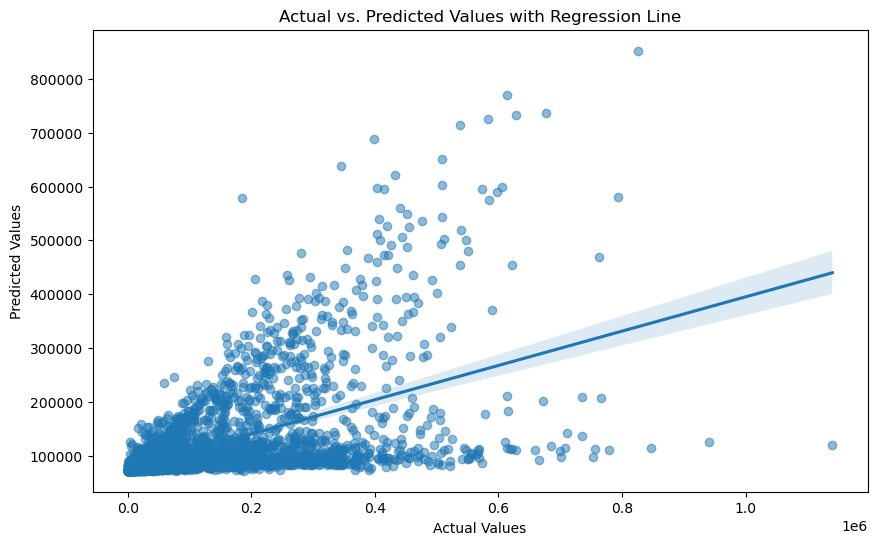

In [5]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_1, scatter_kws={'alpha':0.5})
plt.title('Actual vs. Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [6]:
y = df_log['avg_d_kbps']

X = df_log[['avg_u_kbps']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3738)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_2 = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)

print(f'Mean Squared Error: {mse}')
print(f'Mean absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

Mean Squared Error: 1.0837205023032246
Mean absolute Error: 0.794410262974918
Coefficients: [0.66126828]
Intercept: 4.54779690975075
R-squared: 0.5155630048937628


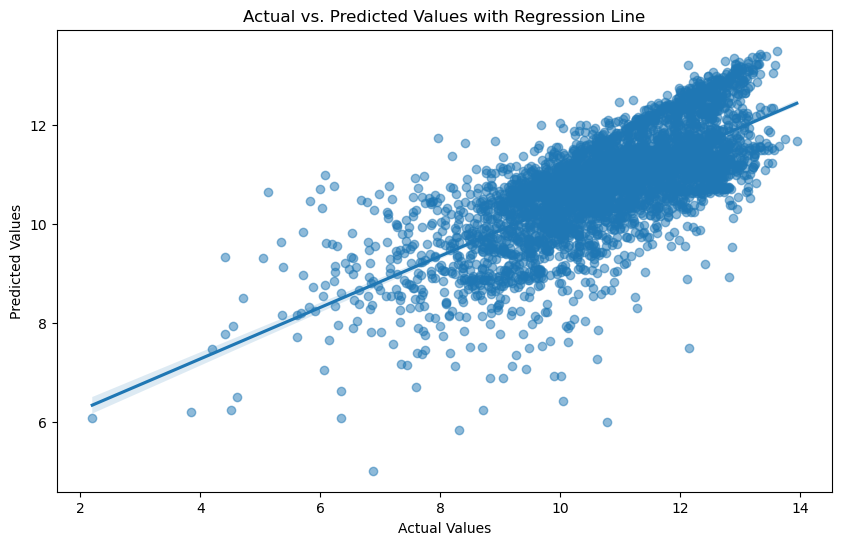

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_2, scatter_kws={'alpha':0.5})
plt.title('Actual vs. Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [8]:
y = df['net_type']

X = df[['avg_d_kbps', 'avg_u_kbps', 'derived_lat_down', 'derived_lat_up']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=345)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.8468923698837797
              precision    recall  f1-score   support

       fixed       0.87      0.81      0.84      1969
      mobile       0.83      0.88      0.85      1989

    accuracy                           0.85      3958
   macro avg       0.85      0.85      0.85      3958
weighted avg       0.85      0.85      0.85      3958



In [9]:
y = df['net_type']

X = df_log[['avg_d_kbps', 'avg_u_kbps', 'derived_lat_down', 'derived_lat_up']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=345)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.8486609398686206
              precision    recall  f1-score   support

       fixed       0.87      0.82      0.84      1969
      mobile       0.83      0.88      0.85      1989

    accuracy                           0.85      3958
   macro avg       0.85      0.85      0.85      3958
weighted avg       0.85      0.85      0.85      3958

